In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="white")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [85]:
import pickle as pkl

In [86]:
with open("cleaned_df.pkl","rb") as f:
    cleaned_autos = pkl.load(f)  ## Reading the data from cleaned_df.pkl

In [87]:
df=cleaned_autos.copy()

In [43]:
df.columns

Index(['index', 'name', 'seller', 'model', 'brand', 'offerType',
       'dollar_price', 'yearOfRegistration', 'monthOfRegistration',
       'vehicleType', 'gearbox', 'fuelType', 'kilometer', 'notRepairedDamage',
       'abtest', 'powerPS', 'postalCode', 'dateCrawled', 'dateCreated',
       'lastSeen'],
      dtype='object')

## The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?

In [89]:
df.drop(["dateCrawled"],axis=1,inplace=True)

In [90]:
df.drop(["dateCreated"],axis=1,inplace=True)

In [91]:
df.drop(["postalCode"],axis=1,inplace=True)

In [98]:
df["dollar_price"]=df["dollar_price"].astype(np.int32)

In [ ]:
df.drop(["last_seen"],axis=1,inplace=True)

In [99]:
df["kilometer"]=df["kilometer"].astype(np.int32)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326472 entries, 0 to 371526
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   name                 326472 non-null  object        
 1   seller               326472 non-null  object        
 2   model                326472 non-null  object        
 3   brand                326472 non-null  object        
 4   offerType            326472 non-null  object        
 5   dollar_price         326472 non-null  int32         
 6   yearOfRegistration   326472 non-null  int64         
 7   monthOfRegistration  326472 non-null  object        
 8   vehicleType          326472 non-null  object        
 9   gearbox              326472 non-null  object        
 10  fuelType             326472 non-null  object        
 11  kilometer            326472 non-null  int32         
 12  notRepairedDamage    326472 non-null  object        
 13  abtest        

## What is the Average price of vehicle by fuel type and gearbox type.Give a plot


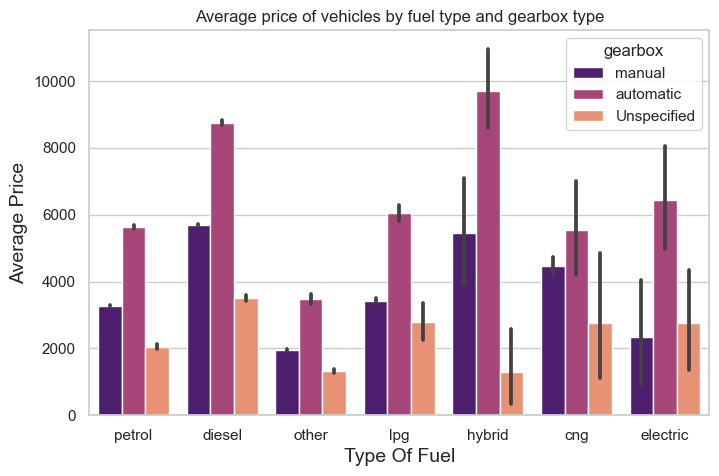

In [101]:
average_power = df.groupby(['vehicleType', 'gearbox'])['powerPS'].mean().reset_index()
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x="fuelType", y="dollar_price",hue="gearbox",palette="magma",data=df)
ax.set_title("Average price of vehicles by fuel type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
plt.show()

## What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

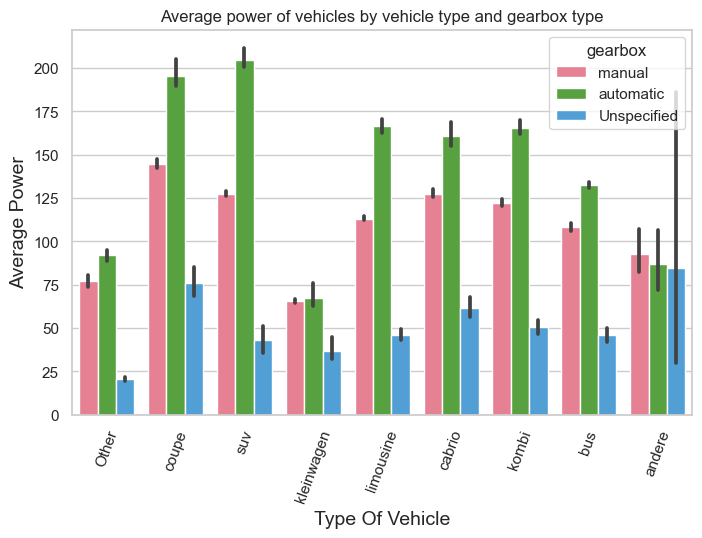

In [102]:
average_power = df.groupby(['vehicleType', 'gearbox'])['powerPS'].mean().reset_index()

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox", palette="husl",data=df)
ax.set_title("Average power of vehicles by vehicle type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Power",fontdict= {'size':14})
plt.xticks(rotation=70)
plt.show()

In [103]:
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["dollar_price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,1517
1,volkswagen,coupe,8815
2,volkswagen,suv,15340
3,volkswagen,kleinwagen,1789
4,volkswagen,limousine,4117


## What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

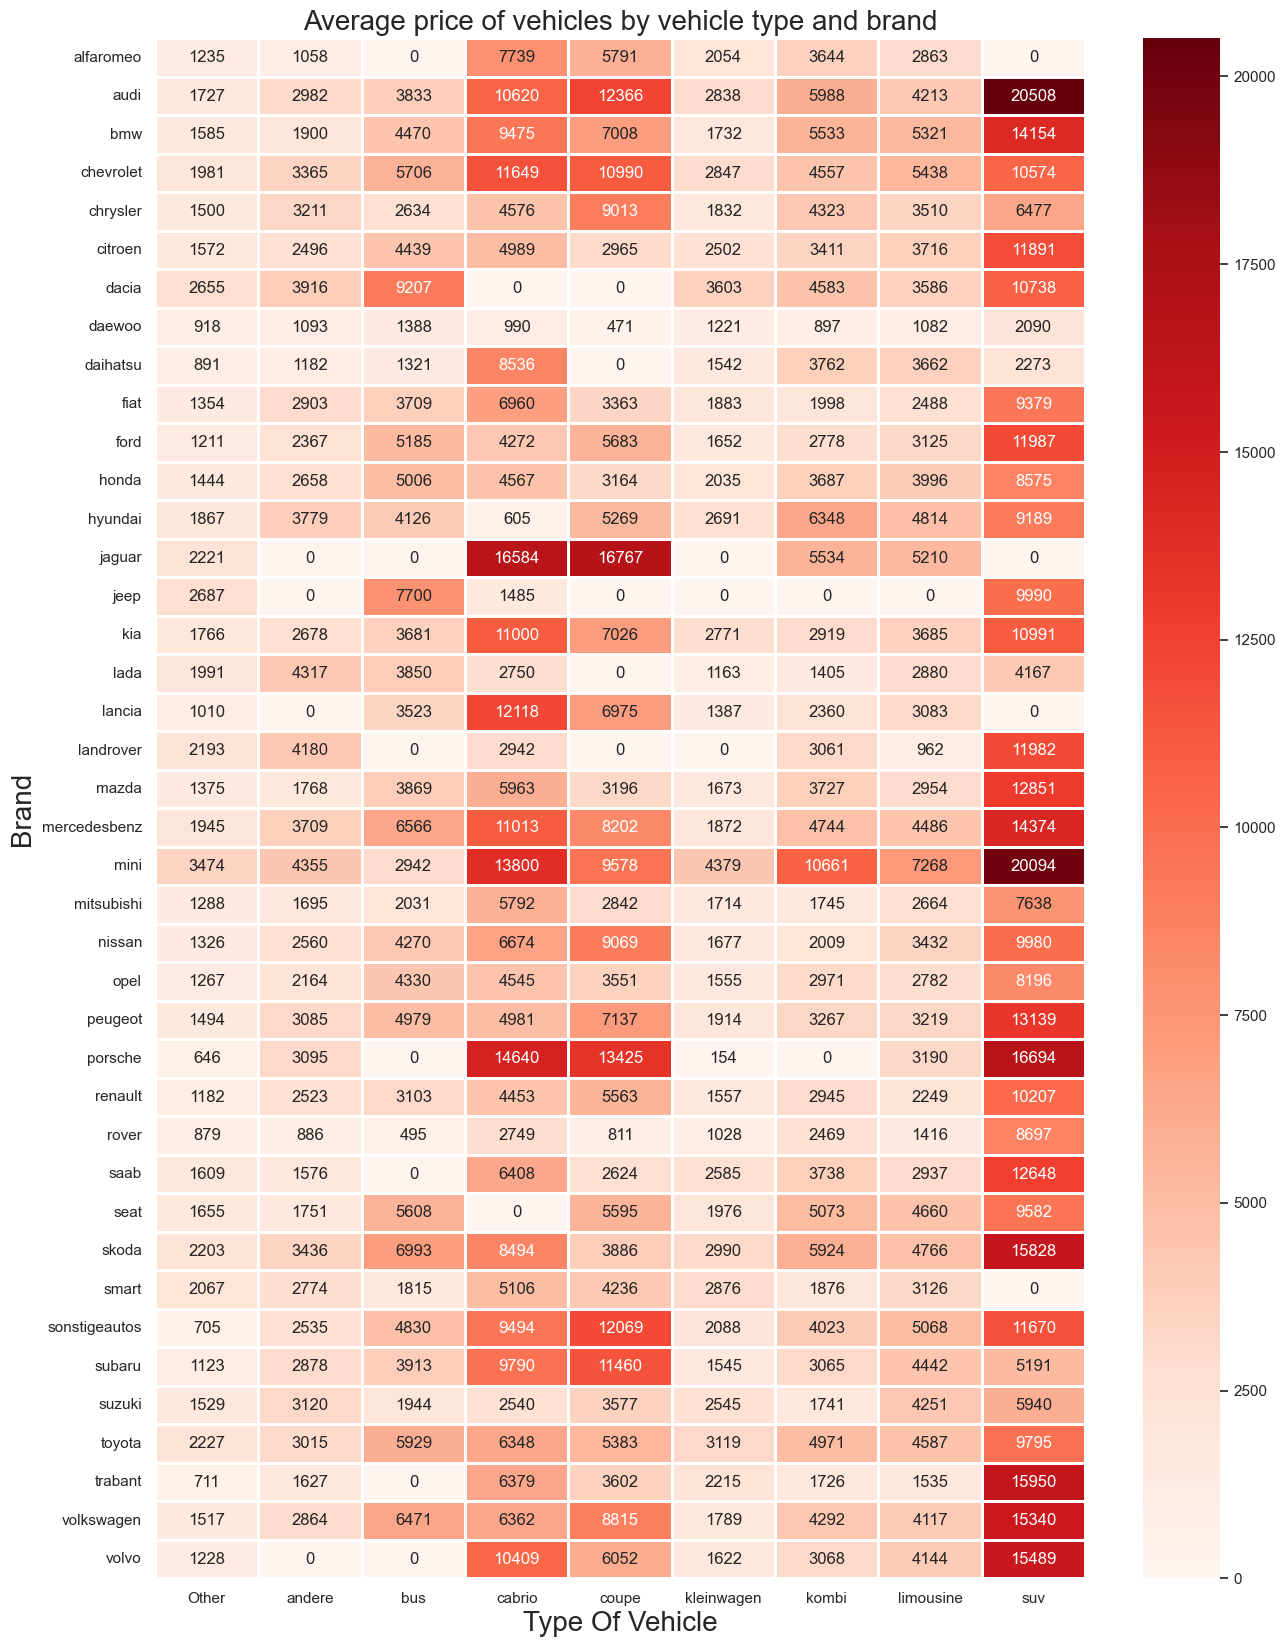

In [104]:
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="Reds",annot=True, ax=ax, fmt="d")
ax.set_title("Average price of vehicles by vehicle type and brand",fontdict={'size':20})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':20})
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})
plt.show()

In [105]:
df

,name,seller,model,brand,offerType,dollar_price,yearOfRegistration,monthOfRegistration,vehicleType,gearbox,fuelType,kilometer,notRepairedDamage,abtest,powerPS,lastSeen
0,Golf31.6,private,golf,volkswagen,Offer,528,1993,Jan,Other,manual,petrol,150000,other,test,0,2016-04-07 03:16:57
1,A5Sportback2.7Tdi,private,Other,audi,Offer,20130,2011,May,coupe,manual,diesel,125000,yes,test,190,2016-04-07 01:46:50
2,"JeepGrandCherokee""Overland""",private,grand,jeep,Offer,10780,2004,Aug,suv,automatic,diesel,125000,other,test,163,2016-04-05 12:47:46
3,GOLF4143TÜRER,private,golf,volkswagen,Offer,1650,2001,Jun,kleinwagen,manual,petrol,150000,no,test,75,2016-03-17 17:40:17
4,SkodaFabia1.4TDIPDClassic,private,fabia,skoda,Offer,3960,2008,Jul,kleinwagen,manual,diesel,90000,no,test,69,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371522,MitsubishiCold,private,colt,mitsubishi,Offer,0,2005,Jul,Other,manual,petrol,150000,yes,control,0,2016-03-21 10:42:49
371523,Suchet4vitoab6sitze,private,Other,sonstigeautos,Offer,2420,2005,Jan,Other,Unspecified,other,20000,other,test,0,2016-04-06 00:46:52
371524,Smartsmartleistungssteigerung100ps,private,fortwo,smart,Offer,1318,2000,Mar,cabrio,automatic,petrol,125000,no,test,101,2016-03-11 18:17:12
371525,VolkswagenMultivanT4TDI7DCUY2,private,transporter,volkswagen,Offer,10120,1996,Mar,bus,manual,diesel,150000,no,test,102,2016-04-07 07:15:26


In [106]:
import pickle as pkl

In [107]:
with open('data_df.pkl','wb') as f:
    pkl.dump(df,f) ## Dumping the updated dataframe into a new pickle file

In [108]:
with open("data_df.pkl","rb") as f:
    autos_data = pkl.load(f) ## Loading data from data_df.pkl

In [109]:
df=autos_data.copy()

In [110]:
df

,name,seller,model,brand,offerType,dollar_price,yearOfRegistration,monthOfRegistration,vehicleType,gearbox,fuelType,kilometer,notRepairedDamage,abtest,powerPS,lastSeen
0,Golf31.6,private,golf,volkswagen,Offer,528,1993,Jan,Other,manual,petrol,150000,other,test,0,2016-04-07 03:16:57
1,A5Sportback2.7Tdi,private,Other,audi,Offer,20130,2011,May,coupe,manual,diesel,125000,yes,test,190,2016-04-07 01:46:50
2,"JeepGrandCherokee""Overland""",private,grand,jeep,Offer,10780,2004,Aug,suv,automatic,diesel,125000,other,test,163,2016-04-05 12:47:46
3,GOLF4143TÜRER,private,golf,volkswagen,Offer,1650,2001,Jun,kleinwagen,manual,petrol,150000,no,test,75,2016-03-17 17:40:17
4,SkodaFabia1.4TDIPDClassic,private,fabia,skoda,Offer,3960,2008,Jul,kleinwagen,manual,diesel,90000,no,test,69,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371522,MitsubishiCold,private,colt,mitsubishi,Offer,0,2005,Jul,Other,manual,petrol,150000,yes,control,0,2016-03-21 10:42:49
371523,Suchet4vitoab6sitze,private,Other,sonstigeautos,Offer,2420,2005,Jan,Other,Unspecified,other,20000,other,test,0,2016-04-06 00:46:52
371524,Smartsmartleistungssteigerung100ps,private,fortwo,smart,Offer,1318,2000,Mar,cabrio,automatic,petrol,125000,no,test,101,2016-03-11 18:17:12
371525,VolkswagenMultivanT4TDI7DCUY2,private,transporter,volkswagen,Offer,10120,1996,Mar,bus,manual,diesel,150000,no,test,102,2016-04-07 07:15:26


In [ ]:
df.to_excel('cleaned_autos_analysis.xlsx')